In [1]:
import pandas as pd

In [2]:
dataset=pd.read_csv("insurance_pre.csv")

In [3]:
dataset

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,10600.54830
1334,18,female,31.920,0,no,2205.98080
1335,18,female,36.850,0,no,1629.83350
1336,21,female,25.800,0,no,2007.94500


In [4]:
dataset=pd.get_dummies(dataset,drop_first=True)
dataset=dataset.astype(int)
dataset

,age,bmi,children,charges,sex_male,smoker_yes
0,19,27,0,16884,0,1
1,18,33,1,1725,1,0
2,28,33,3,4449,1,0
3,33,22,0,21984,1,0
4,32,28,0,3866,1,0
...,...,...,...,...,...,...
1333,50,30,3,10600,1,0
1334,18,31,0,2205,0,0
1335,18,36,0,1629,0,0
1336,21,25,0,2007,0,0


In [5]:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes'], dtype='object')

In [6]:
independent=dataset[['age','bmi', 'children','sex_male', 'smoker_yes']]
independent

,age,bmi,children,sex_male,smoker_yes
0,19,27,0,0,1
1,18,33,1,1,0
2,28,33,3,1,0
3,33,22,0,1,0
4,32,28,0,1,0
...,...,...,...,...,...
1333,50,30,3,1,0
1334,18,31,0,0,0
1335,18,36,0,0,0
1336,21,25,0,0,0


In [7]:
dependent=dataset[["charges"]]
dependent

,charges
0,16884
1,1725
2,4449
3,21984
4,3866
...,...
1333,10600
1334,2205
1335,1629
1336,2007


In [8]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(independent,dependent, test_size=0.2, random_state=0)

In [9]:
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)


In [10]:
adaboost_reg = AdaBoostRegressor(n_estimators=50, random_state=42)
adaboost_reg.fit(X_train, y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(random_state=42)

In [11]:
X_train

,age,bmi,children,sex_male,smoker_yes
621,37,34,4,1,1
194,18,34,0,1,0
240,23,36,2,0,1
1168,32,35,2,1,0
1192,58,32,1,0,0
...,...,...,...,...,...
763,27,26,0,1,0
835,42,35,2,1,0
1216,40,25,0,1,0
559,19,35,0,1,0


In [12]:
y_pred_train = adaboost_reg.predict(X_train)
y_pred_test = adaboost_reg.predict(X_test)

In [13]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Train MSE:", train_mse)
print("Test MSE:", test_mse)

Train MSE: 24970217.55027675
Test MSE: 22221664.01144674


ValueError: x and y must be the same size

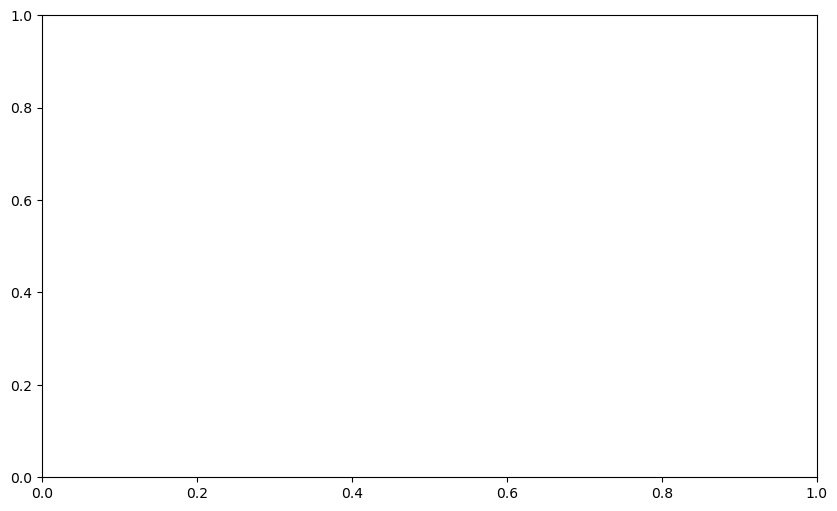

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color='blue', label='Training data')
plt.scatter(X_test, y_test, color='red', label='Testing data')
plt.plot(X_train, y_pred_train, color='green', label='Predictions')
plt.title('AdaBoost Regression')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.legend()
plt.show()